# Estimación de distribuciones

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm

Datos base para los ejercicios siguientes.

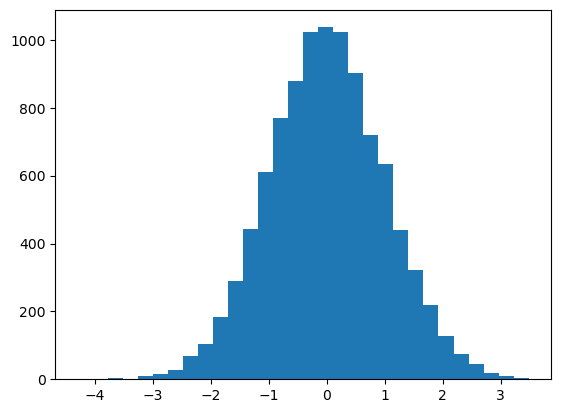

In [13]:
sample = normal(size=10000) # Generador aleatorio
plt.hist(sample, bins=30)
plt.show()

## Estmación paramétrica
- Se basa en forzar (calcular) los parámetros de la distribución, estos parametros en si son media y la desviación estandar para una distribución normal.

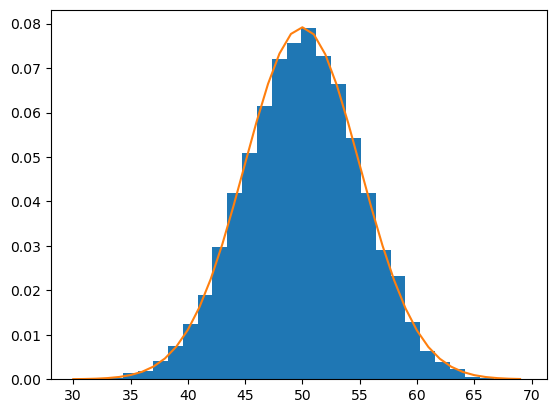

In [20]:
# loc = media (mu), scale = desviación estandar (sigma)
sample = normal(loc=50, scale=5, size=10000)
mu = sample.mean()
sigma = sample.std()

# distribución 
dist = norm(mu, sigma)
values = [value for value in range(30, 70, 1)]
probabilities = [dist.pdf(value) for value in values]

# Visualización de los datos (sample) junto a su distribución (probabilities)
plt.hist(sample, bins=30, density=True) # Con density=True nos regrresa probabilidades y no las frecuecias en el eje Y
plt.plot(values, probabilities)

plt.show()

## Estimación no paramétrica
- No forza los parámetros de una distribución única, combina varias distribuciones.
- Se adapta a una aplia variedad de datos, es bastante útil cuando se desconoce la forma de la distribución.

Aplica la técnica:
- Kernel density estimation:
  - Smoothing parameter: Parámetro de suavizado
  - Basis function: Función base


[Documentación](https://scikit-learn.org/stable/modules/density.html)

Librerias:

In [22]:
from numpy import hstack # Juntar varios arrays
from sklearn.neighbors import KernelDensity # Técnica de estimación.

Construcción de una distribución bimodal:

In [27]:
# loc = media (mu), scale = desviación estandar (sigma)
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# bandwidth: parametro de suavizado
# kernerl: función base
model = KernelDensity(bandwidth=2, kernel='gaussian')

# Modificamos la estructura de datos para utilizarlo en el modelo (model)
sample = sample.reshape(len(sample), 1)

model.fit(sample)

KernelDensity(bandwidth=2)

In [28]:
print(f"min={sample.min()}, max ={sample.max()}")

min=8.027356348122368, max =55.264935326674504


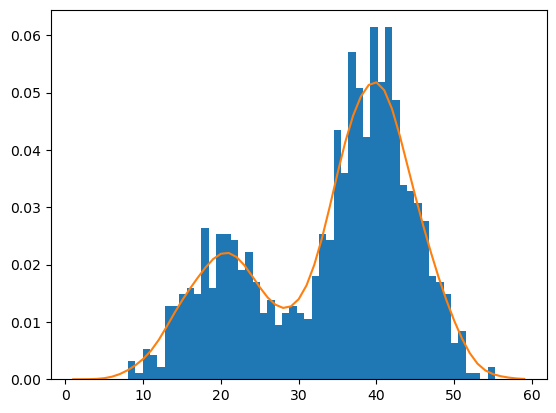

In [32]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape(len(values), 1)
# Probabilidades
probabilities = model.score_samples(values) # Probabilidad logaritmica
probabilities = np.exp(probabilities) # Inversión de probabilidad
# Visualización
plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()
